### impoerter les package 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pydot
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import model_from_json


### 1) Préparation la BDD

In [2]:
df = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = df.load_data()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

9
Ankle boot
s.v.p metrre  Ankle boot à l'indice 9


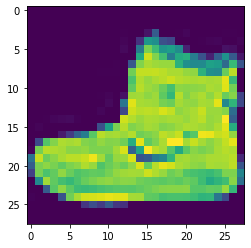

In [3]:
plt.imshow(X_train[0])
print(y_train[0])
print(class_names[y_train[0]])

print("s.v.p metrre ",class_names[y_train[0]],"à l'indice" ,y_train[0])

##### *  normaliser la BDD

In [4]:
X_train_n = X_train/ 255.
X_test_n = X_test / 255.


#### * Split the data into train/validation/test datasets

In [5]:
X_train, X_valid     =    X_train_n[5000:],  X_train_n[:5000]
y_train, y_valid     =    y_train[5000:],    y_train[:5000]
X_test = X_test_n

### 2) Création l'architecture de model

In [6]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

#model.summary()

##obtenir les parametres de notre model
#weights, biases = model.layers[1].get_weights()

### 3) Entrainer le model

In [7]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [8]:
model_h = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 23s 414us/sample - loss: 0.7226 - accuracy: 0.7640 - val_loss: 0.5076 - val_accuracy: 0.8314
Epoch 2/30
55000/55000 [==============================] - 22s 395us/sample - loss: 0.4843 - accuracy: 0.8324 - val_loss: 0.4541 - val_accuracy: 0.8490
Epoch 3/30
55000/55000 [==============================] - 19s 347us/sample - loss: 0.4413 - accuracy: 0.8461 - val_loss: 0.4372 - val_accuracy: 0.8500
Epoch 4/30
55000/55000 [==============================] - 19s 342us/sample - loss: 0.4128 - accuracy: 0.8545 - val_loss: 0.4152 - val_accuracy: 0.8562
Epoch 5/30
55000/55000 [==============================] - 18s 322us/sample - loss: 0.3926 - accuracy: 0.8618 - val_loss: 0.3807 - val_accuracy: 0.8652
Epoch 6/30
55000/55000 [==============================] - 20s 362us/sample - loss: 0.3770 - accuracy: 0.8664 - val_loss: 0.3723 - val_accuracy: 0.8680
Epoch 7/30
55000/55000 [=====================

### 4) tester la performence de model

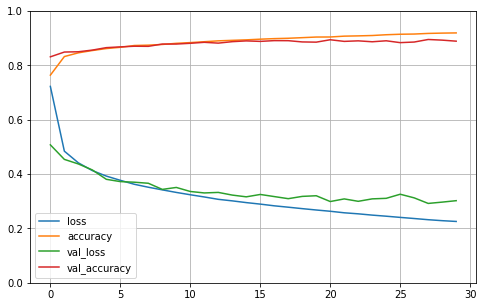

10000/10000 [==============================] - 2s 175us/sample - loss: 0.3340 - accuracy: 0.8806


[0.3340370476841927, 0.8806]

In [9]:
#model_h.params
#model_h.history

pd.DataFrame(model_h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(X_test, y_test)

### 5) Validation le model

In [10]:
X_new = X_test[:3]

y_pred = model.predict_classes(X_new)


np.array(class_names)[y_pred]



array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


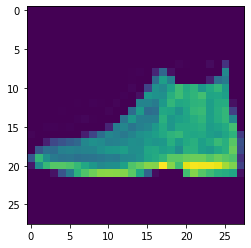

In [11]:

print(plt.imshow(X_test[0]))


AxesImage(54,36;334.8x217.44)


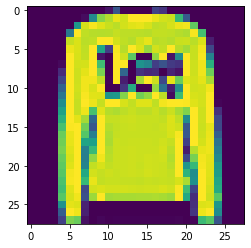

In [12]:
print(plt.imshow(X_test[1]))


AxesImage(54,36;334.8x217.44)


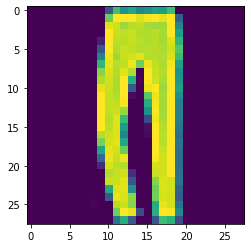

In [15]:
print(plt.imshow(X_test[2]))